In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
from scipy import signal
from math import exp
import processes.foundation as fd
from math import exp, sqrt, pi, erfc
from lmfit import Model
import csv
from scipy.optimize import curve_fit
import pywt
from statistics import median
import copy

In [114]:
def find_closest_idx(arr, val):
       idx = np.abs(arr - val).argmin()
       return idx

In [133]:
def pulsar(riseMax,riseMin, E90, EMin):
    rise = int((riseMax-riseMin)*np.random.random()+riseMin)
    energy = (E90-EMin)*np.random.random()+EMin

    pulse = np.zeros(15000)
    x = np.linspace(0,rise+10,rise+11)
    y = x*(energy/rise) + 0

    pulse[13000: 13000+len(x)] = y
    pulse[13000+len(x)::] = np.ones(15000-13000-len(x))*y[-1]

    return pulse, rise, energy

In [156]:
def checkRise(rise_true, rise_cal, energy, eps, correct, false, Emin, Emax, Nb):
    steps = (Emax - Emin)/Nb
    bins = np.arange(Emin,Emax,steps)
    if abs(rise_true-rise_cal) <= eps:
        for j in range(0, len(bins)-1):
            if energy >= bins[j] and energy <= bins[j+1]:
                correct[j] += 1
    else:
        for j in range(0, len(bins)-1):
            if energy >= bins[j] and energy <= bins[j+1]:
                false[j] += 1
    return correct, false

In [164]:
run_list = 9188
data = fd.get_t1_data(run_list, "Card1")

Emin = 100
Emax = 1000
steps = 100000
nb = 10000
rise_true = np.zeros(steps)
rise_cal = np.zeros(steps)
energy_true = np.zeros(steps)
#correct = np.zeros(nb)
#false = np.zeros(nb)
deltat = np.zeros(steps)

run_list = 9188
data = fd.get_t1_data(run_list, "Card1")
wave = data[0]["waveform"]["values"].nda[0]

cDs = pywt.swt(wave, "haar", level=4)
threshold = np.zeros_like([0,0,0,0])

j=0
for cD in cDs:
    median_value = median(cD[1])
    median_average_deviation = median([abs(number-median_value) for number in cD[1]])
    sig1 = median_average_deviation/0.6745
    threshold[j] = sig1*np.sqrt(2*np.log(len(wave)))
    j+=1

j=0
for cD in cDs:
    cD[1][abs(cD[1]) < threshold[j]] = 0.0
    j += 1

wave = pywt.iswt(cDs, "Haar")
#"""
for i in range(0,steps):
    pulse, rise_true[i], energy_true[i] = pulsar(70,50,Emax,Emin)
    wave1 = copy.deepcopy(wave)
    wp = wave1[0:15000] + pulse
    max = np.amax(wp)
    min = np.amin(wp)
    m90 = max - (max-min)*0.10
    m10 = max - (max-min)*0.90
    imax9 = find_closest_idx(wp, m90)
    imax1 = find_closest_idx(wp, m10)
    rise_cal[i] = imax9 - imax1
    deltat[i] = rise_cal[i] - rise_true[i]

    #correct, false = checkRise(rise_true[i], rise_cal[i], energy_true[i], 10, correct, false, Emin, Emax, nb)
#"""
    
    


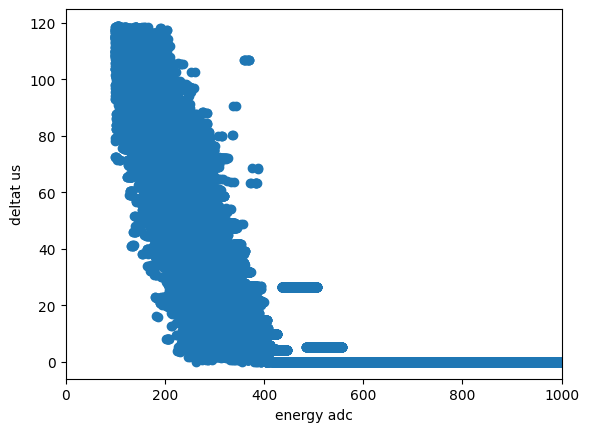

In [171]:
plt.scatter(energy_true, deltat*.008)
plt.xlim(0, 1000)
plt.xlabel("energy adc")
plt.ylabel("deltat us")
plt.show()

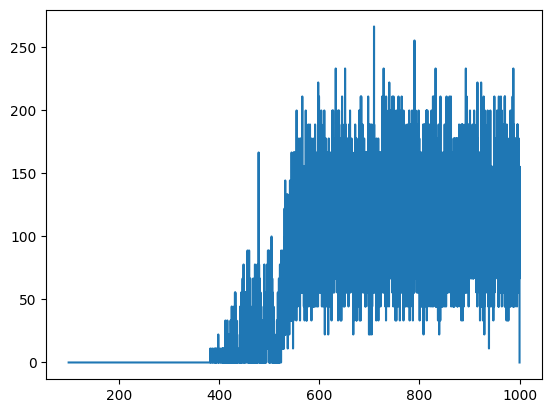

In [163]:
steps = (Emax - Emin)/nb
bins = np.arange(Emin,Emax,steps)
plt.plot(bins, correct/steps)

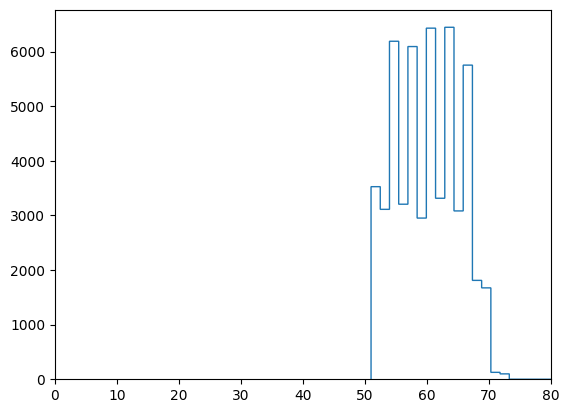

In [155]:
plt.hist(rise_cal, histtype="step", bins=10000)
plt.xlim(0,80)
plt.show()

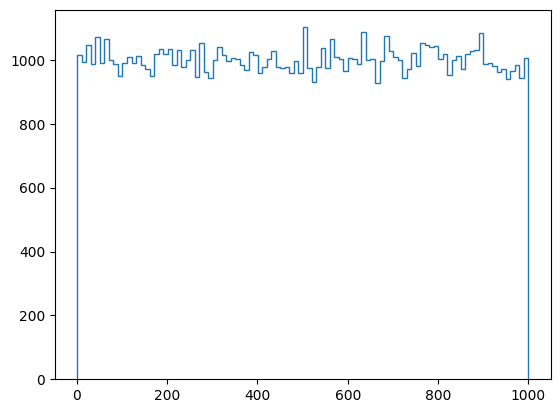

In [129]:
plt.hist(energy_true, histtype="step", bins=100)
plt.show()

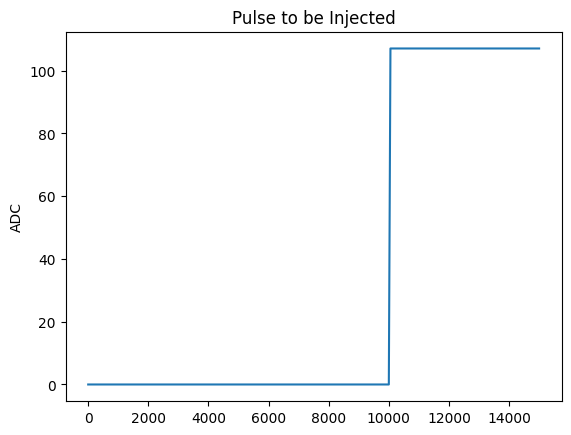

In [116]:
pulse = pulsar(100,1,200,1)
plt.plot(pulse)
plt.ylabel("Time [clks]")
plt.ylabel("ADC")
plt.title("Pulse to be Injected")
plt.show()

In [46]:
run_list = 9188
data = fd.get_t1_data(run_list, "Card1")

In [112]:
pulse = pulsar(70,50,200,1)
wave = data[0]["waveform"]["values"].nda[0]
wp = wave[0:15000] + pulse

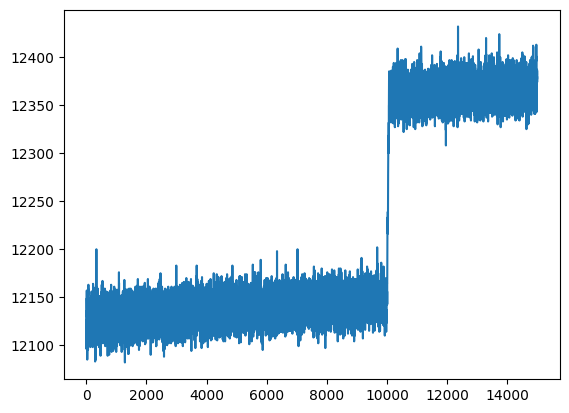

In [113]:
plt.plot(wp)

In [106]:
run_list = [9188, 9199, 9200, 9201, 9202]
data1 = fd.get_t1_data(run_list[0], "Card1")
data2 = fd.get_t1_data(run_list[1], "Card1")
data3 = fd.get_t1_data(run_list[2], "Card1")
data4 = fd.get_t1_data(run_list[3], "Card1")
data5 = fd.get_t1_data(run_list[4], "Card1")

In [65]:
wave =data[0]["waveform"]["values"].nda[1]

In [107]:
l = len(data1[0]["waveform"]["values"].nda) + len(data2[0]["waveform"]["values"].nda) + len(data3[0]["waveform"]["values"].nda) + len(data4[0]["waveform"]["values"].nda) + len(data5[0]["waveform"]["values"].nda)
rise_time = np.zeros(l)

In [109]:

for i,wave in enumerate(data1[0]["waveform"]["values"].nda):
    j = i + len(data1[0]["waveform"]["values"].nda)
    max = np.amax(wave)
    min = np.amin(wave)
    m90 = max - (max-np.amin(wave))*0.10
    m10 = max - (max-np.amin(wave))*0.90
    imax9 = find_closest_idx(wave, m90)
    imax1 = find_closest_idx(wave, m10)
    rise_time[j] = imax9 - imax1

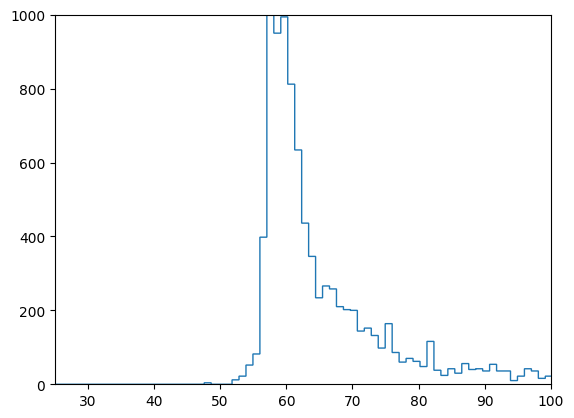

In [111]:
plt.hist(rise_time, histtype="step", bins = 20000)
plt.xlim(25,100)
plt.ylim(0,1000)
plt.show()

61


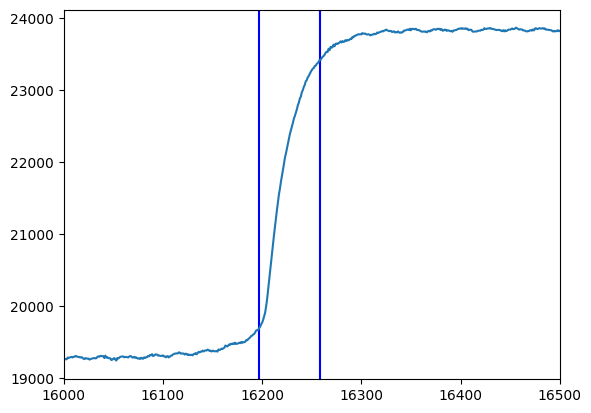

In [90]:
max = np.amax(wave)
min = np.amin(wave)
m90 = max - (max-np.amin(wave))*0.10
m10 = max - (max-np.amin(wave))*0.90
imax9 = find_closest_idx(wave, m90)
imax1 = find_closest_idx(wave, m10)
plt.axvline(x = imax9, color='b', label = 'window_1')
plt.axvline(x = imax1, color='b', label = 'window_1')
plt.plot(wave)
plt.xlim(16000,16500)
plt.show()